In [7]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

from sklearn.preprocessing import PolynomialFeatures

In [9]:
data = np.loadtxt('final_data.txt', delimiter=';')

# number of training data
n = data.shape[0] #YOUR CODE HERE
print(n)

#select the train data and test data
idx = np.random.permutation(range(n))
idx_test = idx[:271]
idx_train = idx[271:1471]
#print(idx_train)
#print(len(idx_train))
#print(len(idx_test))
train_data = data[idx_train,:]
test_data = data[idx_test, :]

#input the data, X
X = np.ones([1200, 2])
X [:, 0] = train_data[:, 0]
X [:, 1] = train_data[:, 1]
#print(X.shape)
print(X)

#input y
y = np.ones([1200, 1])
y [:, 0] = train_data[:, 2]
print (y)

1471
[[  0.36  11.9 ]
 [  0.6    9.3 ]
 [  0.45  11.2 ]
 ..., 
 [  0.66   9.6 ]
 [  0.61  10.9 ]
 [  0.59  10.3 ]]
[[ 6.]
 [ 6.]
 [ 6.]
 ..., 
 [ 6.]
 [ 6.]
 [ 5.]]


In [10]:
#define the predictive function
def pred_f (X, w):
    y_pred = X.dot(w)
    return y_pred
#print(pred_f(X,w))

In [11]:
#define the loss function
def loss_mse(w,X,y): 
    n = len(y)
    y_pred = pred_f (X, w) 
    z = y_pred - y
    loss = 1/n*(z.T).dot(z)
    return loss
#print(mse_f(X, w, y))

In [12]:
d = 4
poly = PolynomialFeatures(d)
X_poly = poly.fit_transform(X)

# run logistic regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_poly, y) # learn the model parameters #YOUR CODE HERE
print('Time=',time.time() - start)

# compute loss value
x=np.zeros([10,4])
w_sklearn = np.zeros([2*d+1,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1:2*d+1,0] = lin_reg_sklearn.coef_
print(w_sklearn)

#calculate the loss based on train_data
X1 = np.ones([1200,a])
X1 [:, 1:2*d+1] = X_poly[:, 0:2*d]
loss_sklearn = loss_mse(w_sklearn,X1,y)
print('loss sklearn=',loss_sklearn)

Time= 0.8186807632446289


ValueError: could not broadcast input array from shape (15) into shape (8)

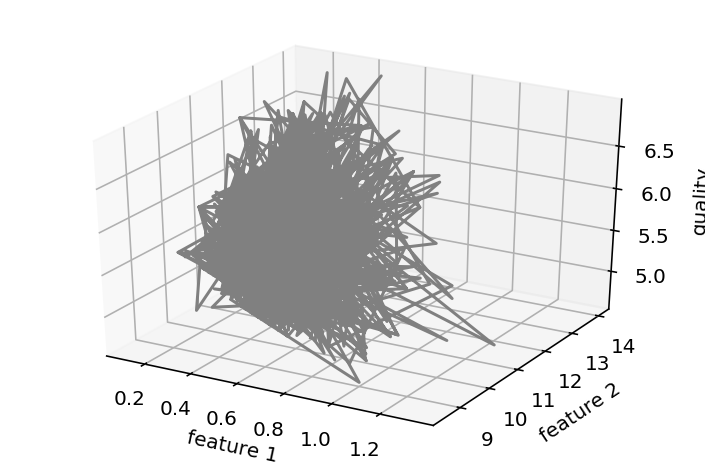

In [21]:
#visualize the data by 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
xline = X[:, 0]
yline = X[:, 1]
zline = w_sklearn[0] + w_sklearn[1]*xline + w_sklearn[2]*yline
ax.set_xlabel('feature 1')   #change if determined
ax.set_ylabel('feature 2')
ax.set_zlabel('quality')
ax.plot3D(xline, yline, zline, 'gray')


In [46]:
#test the error by test_data
X2 = np.ones([271, 3])
X2[:, 1] = test_data[:, 0]
X2[:, 2] = test_data[:, 1]
y2 = np.ones([271, 1])
y2[:, 0] = test_data[:, 2]
loss_test = loss_mse(w_sklearn,X2,y2)
print('loss based on test data =',loss_test)

loss based on test data = [[ 1.16565615]]
